In [1]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.datasets import mnist
import os

2023-10-16 15:55:21.436206: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-16 15:55:21.615297: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-16 15:55:23.120051: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_test= X_test/255.0
X_train = X_train/255.0
X_train = tf.reshape(tf.cast(X_train, tf.float32), [-1, 28*28])
X_test = tf.reshape(tf.cast(X_test, tf.float32), [-1, 28*28])

y = y_test
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

2023-10-16 15:55:29.913212: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-16 15:55:30.404785: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-16 15:55:30.404864: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-16 15:55:30.411771: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-16 15:55:30.411844: I tensorflow/compile

In [13]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train[0].shape)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(512, activation='relu'))
model.add(Flatten(input_shape=(X_train[0].shape)))
model.add(Dense(10, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3368 - accuracy: 0.8964 - val_loss: 0.1930 - val_accuracy: 0.9414
Epoch 2/30
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1559 - accuracy: 0.9531 - val_loss: 0.1536 - val_accuracy: 0.9550
Epoch 3/30
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1204 - accuracy: 0.9639 - val_loss: 0.1244 - val_accuracy: 0.9640
Epoch 4/30
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1006 - accuracy: 0.9687 - val_loss: 0.1203 - val_accuracy: 0.9646
Epoch 5/30
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0862 - accuracy: 0.9730 - val_loss: 0.1143 - val_accuracy: 0.9649
Epoch 6/30
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0738 - accuracy: 0.9770 - val_loss: 0.1167 - val_accuracy: 0.9662
Epoch 7/30
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0648 - accuracy: 0.9795 - val_loss: 0.1189 - val_accuracy

In [15]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.1952 - accuracy: 0.9682


[0.19519539177417755, 0.9682000279426575]

In [16]:
def start_count(arr):
    result = np.zeros(10)
    for i in range(len(arr)):
        path = os.path.join('photos', arr[i])
        image = tf.keras.utils.load_img(path)
        image = tf.image.resize(image, (28, 28))
        image = tf.image.rgb_to_grayscale(image)
        image = tf.squeeze(image, axis=2)
        image = image.numpy()
        prediction = model.predict(image.reshape(-1, 28*28), verbose=0)
        prediction = tf.argmax(prediction, axis=1)
        result[int(prediction)-1]+=1
        if i%500==0:
            print(f'i = {i}, result = {result}')
    return result


In [17]:
arr = os.listdir('photos')
# result = start_count(arr)
# print(f'result = {result}')
# [1709. 2156. 1268. 1871. 1027.  304. 1041.  377.  283. 1964.] 5 эпох

In [23]:
model.save('main-model_10e.h5')

/home/ark/miniconda3/envs/tf/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
def show_image(x):
    image = tf.keras.utils.load_img(f'photos/{x}')
    image = tf.image.resize(image, (28, 28))
    image = tf.image.rgb_to_grayscale(image)
    image = tf.squeeze(image, axis=2)
    x = image.numpy()
    prediction = model(x.reshape(1, 28*28))
    print(np.argmax(prediction))
    plt.imshow(image, cmap='binary')
    # print(image.shape)    

6


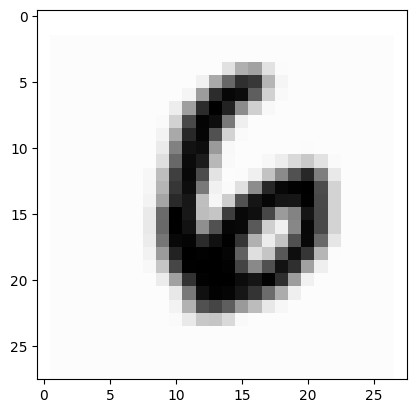

In [31]:
show_image(arr[0])

In [20]:
pred_test = model.predict(X_test)
pred_test = np.argmax(pred_test, axis=1)

print(pred_test.shape)

print(pred_test[:20])
print(y[:20])

313/313 [==============================] - 1s 2ms/step
(10000,)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred=pred_test, y_true=y)
# tf.math.confusion_matrix(y, pred_test)

array([[ 968,    0,    0,    0,    2,    1,    3,    1,    2,    3],
       [   0, 1126,    4,    0,    0,    2,    2,    1,    0,    0],
       [   2,    2, 1003,    2,    3,    2,    3,    9,    6,    0],
       [   0,    0,    4,  986,    0,    1,    0,    4,   14,    1],
       [   0,    1,    5,    0,  952,    3,    5,    3,    4,    9],
       [   3,    2,    0,   19,    1,  840,    9,    0,   15,    3],
       [   6,    3,    0,    1,    3,    1,  936,    1,    7,    0],
       [   1,    6,    9,    3,    1,    2,    1, 1000,    2,    3],
       [  10,    4,    4,    7,    2,    1,    4,    3,  938,    1],
       [   3,    5,    0,    6,   22,   10,    1,   15,   18,  929]])